In [1]:
import TensorFrost as tf
import numpy as np

tf.initialize(tf.opengl)

N = 141871

def random_value(seed, max_value):
    return tf.int(tf.pcg(tf.uint(seed)) % tf.uint(max_value))

def xor_swap(idx, n, seed):
    xor_seed = random_value(seed, n)
    xor_idx = (idx ^ xor_seed)
    max_idx = tf.max(idx, xor_idx)
    min_idx = tf.min(idx, xor_idx)
    swap = random_value(min_idx*451 + seed, 2) == 0
    return tf.select(swap & (max_idx < n), xor_idx, idx)

def reverse(idx, n):
    return n - 1 - idx

def shuffle(idx, n, seed = 0,  iters = 16):
    for i in range(iters):
        idx = xor_swap(idx, n, seed + i)
        idx = reverse(idx, n)
    return idx

def shuffle_test():
    idx, = tf.indices([N])
    idx = shuffle(idx, N, 0)
    return idx

shuffle_test_func = tf.compile(shuffle_test)

TensorFrost module loaded!
shuffle_test:
  Kernel count: 1
  Intermediate buffers: 0
  Host readbacks: 0
  Host writes: 0
  Lines of generated code: 502
  IR Compile time: 5.056000 ms
  Codegen time: 1.145900 ms
  Host Compile time: 1378.048584 ms
  Shader Compile time: 0.591300 ms



In [2]:
shuffled = shuffle_test_func()

shuffled = shuffled.numpy
print(shuffled)

#check if values are unique
print(np.unique(shuffled).size == shuffled.size)

[ 56736  94019  21191 ...  79432  80576 133828]
True


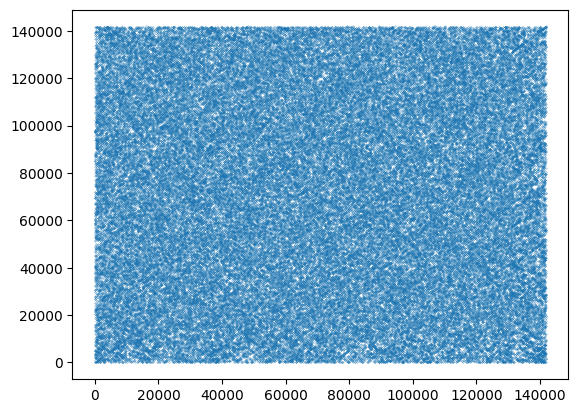

[ 15079  72733  39614 ...  50057   5192 128037]


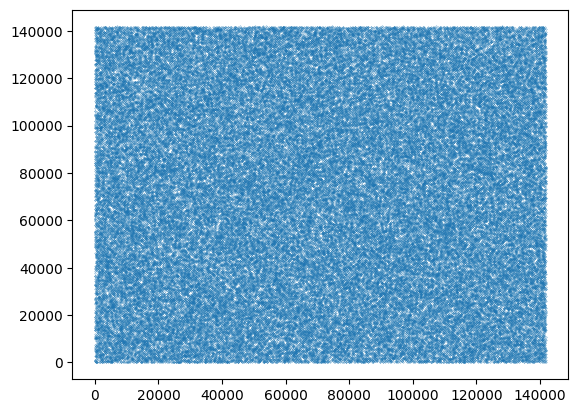

In [3]:
#plot the shuffled indices as scatter plot
import matplotlib.pyplot as plt
plt.scatter(np.arange(N), shuffled, s=0.05)
plt.show()

#compare with numpy shuffle
shuffled_np = np.arange(N)
np.random.seed(1)
np.random.shuffle(shuffled_np)
print(shuffled_np)
plt.scatter(np.arange(N), shuffled_np, s=0.05)
plt.show()